In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('MatplotLib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.15.4
Pandas: 0.23.4
MatplotLib: 3.0.2
Seaborn: 0.9.0
Scipy: 1.1.0
Sklearn: 0.20.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('dataset.csv')

In [35]:
print(data.columns)

Index(['Latitude', 'Longitude', 'Time', 'Class'], dtype='object')


In [36]:
print(data.shape)

(303000, 4)


In [37]:
print(data.describe())

            Latitude      Longitude           Time          Class
count  303000.000000  303000.000000  303000.000000  303000.000000
mean       12.975336      79.545953   22022.682990       0.009901
std         0.727536       5.675515   13178.084606       0.099010
min         0.002579       0.023764       0.000000       0.000000
25%        12.899202      80.010194   10910.000000       0.000000
50%        12.979692      80.093344   21809.000000       0.000000
75%        13.060268      80.176512   32699.000000       0.000000
max        24.995320      80.259999   86378.000000       1.000000


In [38]:
data = data.sample(frac = 1, random_state = 1)

print(data.shape)

(303000, 4)


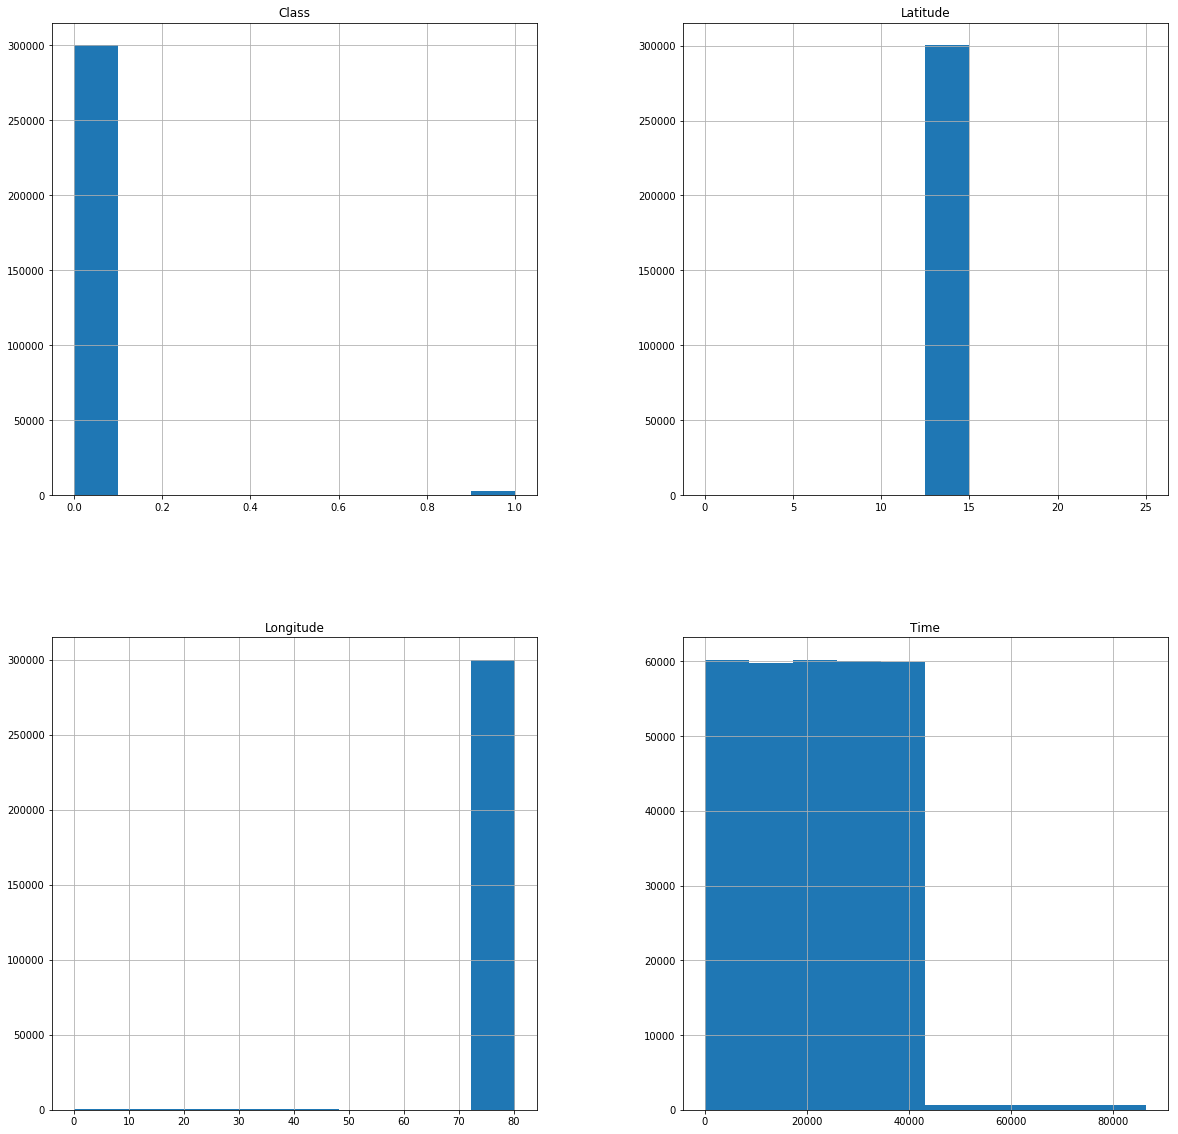

In [39]:
data.hist(figsize = (20, 20))
plt.show()

In [40]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print('Outlier fraction: {}\nFraud Cases: {}\nValid Cases: {}'.format(outlier_fraction, len(Fraud), len(Valid)))

Outlier fraction: 0.01
Fraud Cases: 3000
Valid Cases: 300000


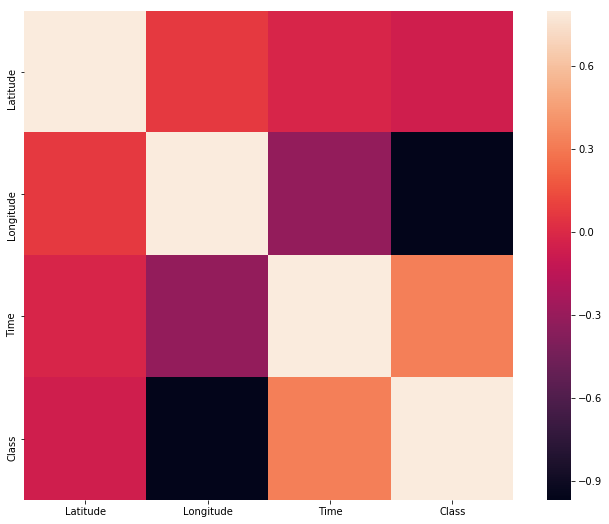

In [41]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [42]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]

target = "Class"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(303000, 3)
(303000,)


In [43]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X),
                                        contamination = outlier_fraction,
                                        random_state = state,
                                       behaviour = "new"),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors=50,
    contamination=outlier_fraction)
}

In [44]:
n_outliers = len(Fraud)

clf = classifiers['Isolation Forest']
clf.fit(X)
scores_pred = clf.decision_function(X)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format('Isolation Forest', n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

Isolation Forest: 30
0.9999009900990099
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300000
           1       0.99      1.00      1.00      3000

   micro avg       1.00      1.00      1.00    303000
   macro avg       1.00      1.00      1.00    303000
weighted avg       1.00      1.00      1.00    303000



In [45]:
import pickle

In [46]:
print(classifiers['Isolation Forest'])

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
        max_features=1.0, max_samples=303000, n_estimators=100,
        n_jobs=None, random_state=1, verbose=0)


In [47]:
model_file = open('classifier.pkl','wb')
pickle.dump(clf, model_file)
model_file.close()

In [48]:
load_file = open('classifier.pkl','rb')
classifier = pickle.load(load_file)
scores_pred = classifier.decision_function(X)
y_pred = classifier.predict(X)

In [49]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
print("{}: {}".format("Isolation Forest", n_errors))
print(accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))

Isolation Forest: 30
0.9999009900990099
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    300000
           1       0.99      1.00      1.00      3000

   micro avg       1.00      1.00      1.00    303000
   macro avg       1.00      1.00      1.00    303000
weighted avg       1.00      1.00      1.00    303000



In [62]:
dictionary = {
    'Latitude': [1],
    'Longitude': [1],
    'Time': [12000]
}
Z = pd.DataFrame(dictionary)
y_pred = classifier.predict(Z)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
#n_errors = (y_pred != Y).sum()
#print("{}: {}".format("Isolation Forest", n_errors))
# print(accuracy_score(Y, y_pred))
# print(classification_report(Y, y_pred))

In [63]:
print(y_pred)

[1]
